#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [50]:
df = pd.read_csv('heart.csv')

In [51]:
df.head() # Top five rows 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
# Summary statistics of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [54]:
df.isnull().sum() # there is no null value in the dataset 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

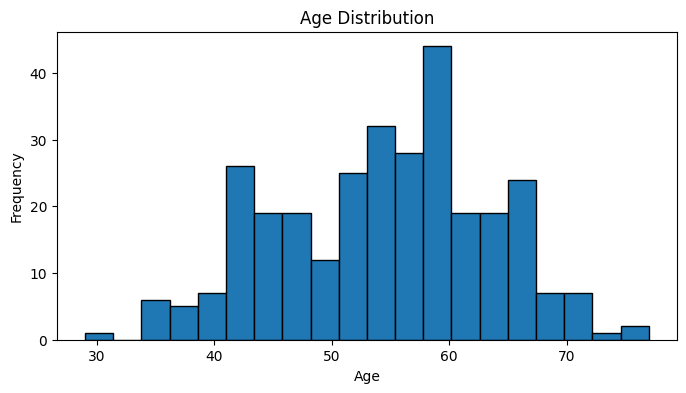

In [55]:
# Univariate Analysis
# Histogram of age
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# age is normally distributed

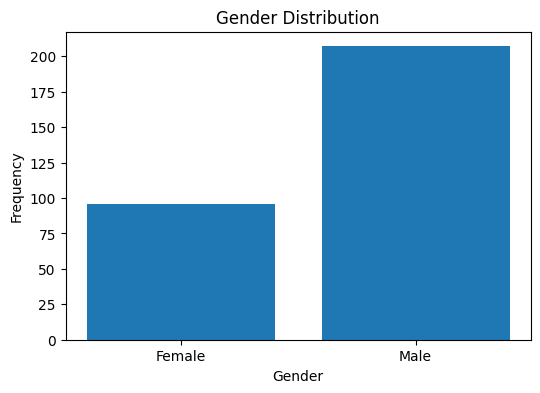

In [56]:
# Univariate Analysis for 'sex' (Bar plot)
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(sex_counts.index, sex_counts.values, tick_label=['Male', 'Female'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()
# there are more male then female 

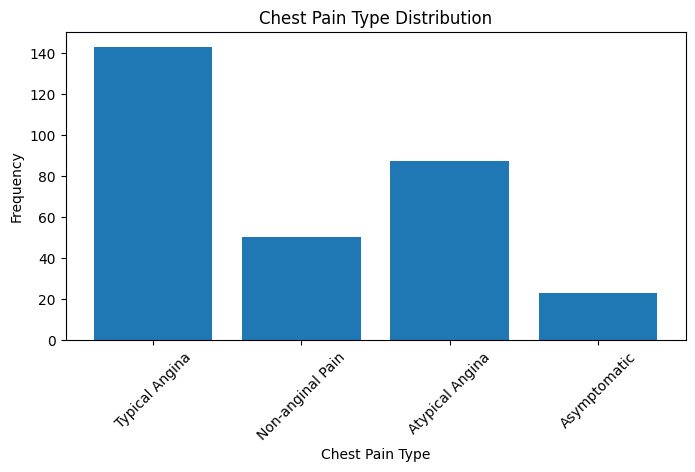

In [57]:
# Univariate Analysis for 'cp' (Bar plot)
cp_counts = df['cp'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(cp_counts.index, cp_counts.values)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks(cp_counts.index, labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], rotation=45)
plt.show()

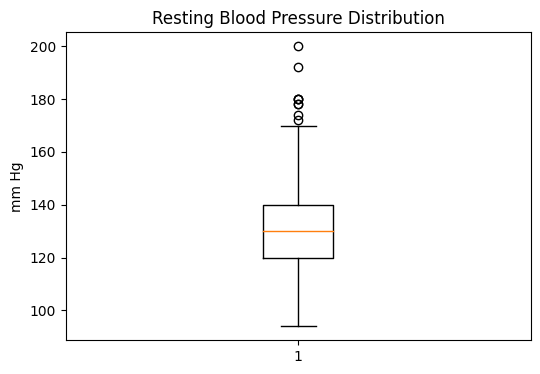

In [58]:
# Univariate Analysis for 'trestbps' (Box plot)
plt.figure(figsize=(6, 4))
plt.boxplot(df['trestbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('mm Hg')
plt.show()
# There are outlier in the Resting blood presure 


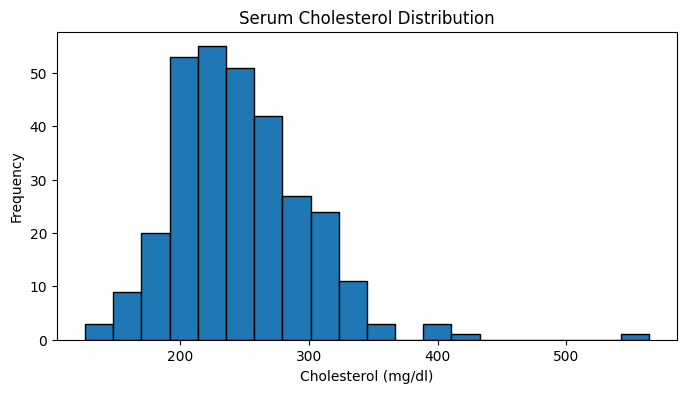

In [59]:
# Univariate Analysis for 'chol' (Histogram)
plt.figure(figsize=(8, 4))
plt.hist(df['chol'], bins=20, edgecolor='k')
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')
plt.show()
# Serum cholestrol is skewed 

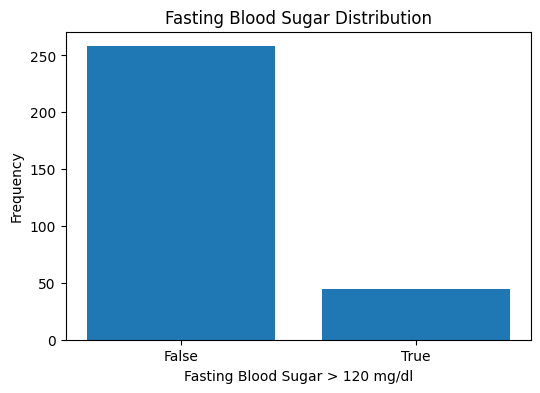

In [60]:
# Univariate Analysis for 'fbs' (Bar plot)
fbs_counts = df['fbs'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(fbs_counts.index, fbs_counts.values, tick_label=['False', 'True'])
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Frequency')
plt.show()

# Fasting blood sugar have more frequecny 



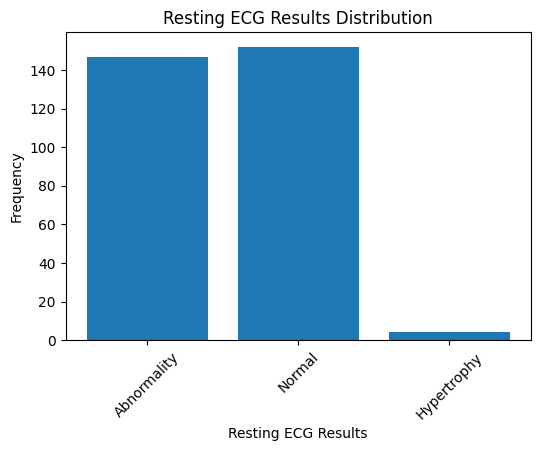

In [61]:
# Univariate Analysis for 'restecg' (Bar plot)
restecg_counts = df['restecg'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(restecg_counts.index, restecg_counts.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Resting ECG Results')
plt.ylabel('Frequency')
plt.xticks(restecg_counts.index, labels=['Normal', 'Abnormality', 'Hypertrophy'], rotation=45)
plt.show()
# Hypertrophy is least in resting ecg distribution 


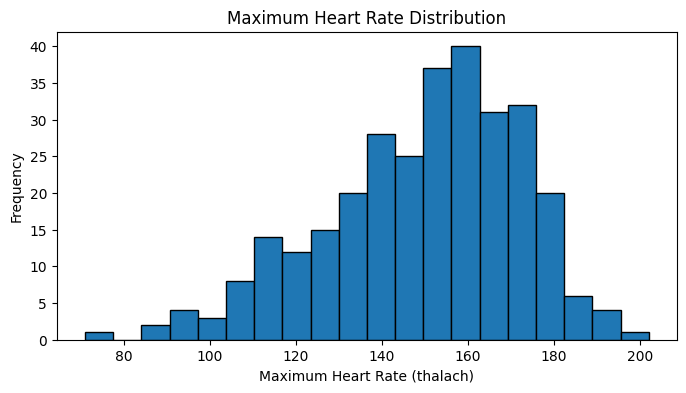

In [62]:
# Univariate Analysis for 'thalach' (Histogram)
plt.figure(figsize=(8, 4))
plt.hist(df['thalach'], bins=20, edgecolor='k')
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Frequency')
plt.show()


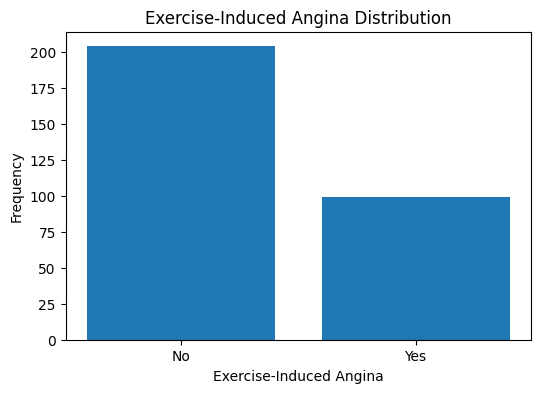

In [63]:
# Univariate Analysis for 'exang' (Bar plot)
exang_counts = df['exang'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(exang_counts.index, exang_counts.values, tick_label=['No', 'Yes'])
plt.title('Exercise-Induced Angina Distribution')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Frequency')
plt.show()

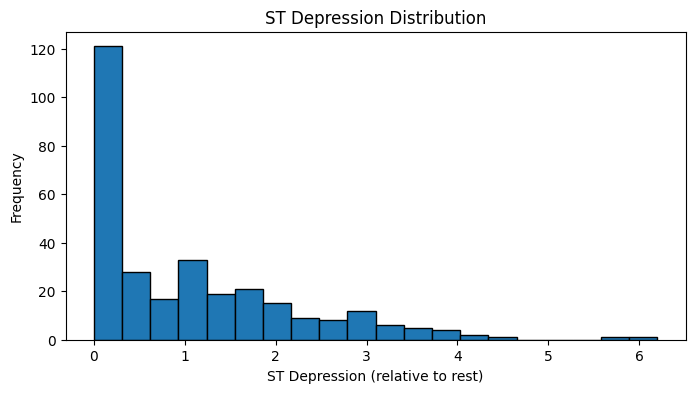

In [64]:
# Univariate Analysis for 'oldpeak' (Histogram)
plt.figure(figsize=(8, 4))
plt.hist(df['oldpeak'], bins=20, edgecolor='k')
plt.title('ST Depression Distribution')
plt.xlabel('ST Depression (relative to rest)')
plt.ylabel('Frequency')
plt.show()


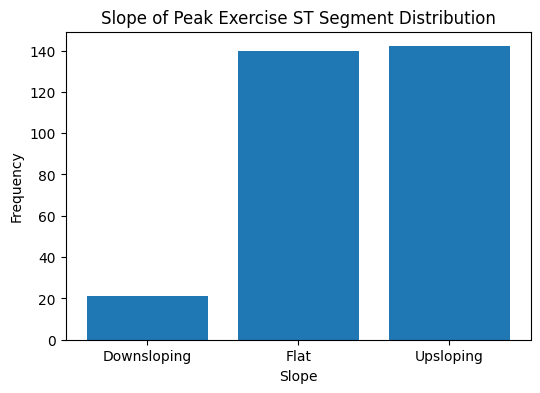

In [65]:
# Univariate Analysis for 'slope' (Bar plot)
slope_counts = df['slope'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(slope_counts.index, slope_counts.values)
plt.title('Slope of Peak Exercise ST Segment Distribution')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.xticks(slope_counts.index, labels=['Upsloping', 'Flat', 'Downsloping'])
plt.show()

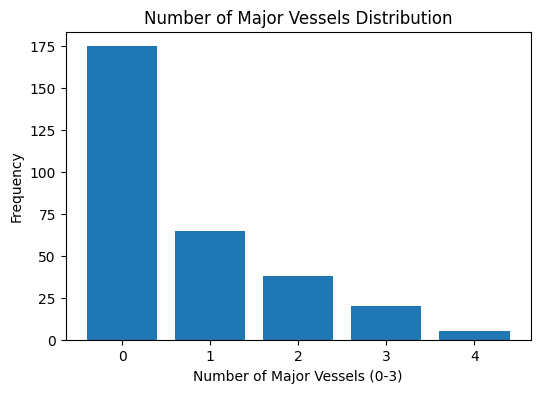

In [66]:
# Univariate Analysis for 'ca' (Bar plot)
ca_counts = df['ca'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(ca_counts.index, ca_counts.values)
plt.title('Number of Major Vessels Distribution')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Frequency')
plt.show()

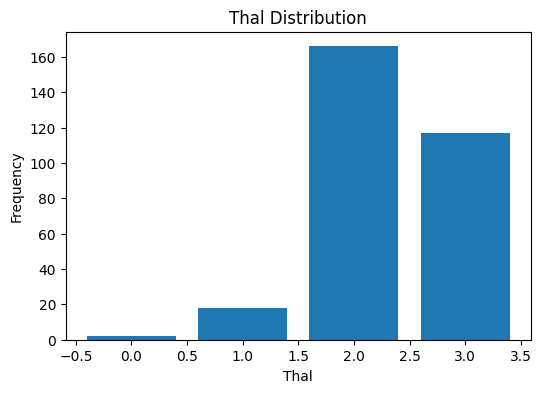

In [67]:
# Univariate Analysis for 'thal' (Bar plot)
thal_counts = df['thal'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(thal_counts.index, thal_counts.values)
plt.title('Thal Distribution')
plt.xlabel('Thal')
plt.ylabel('Frequency')
plt.show()

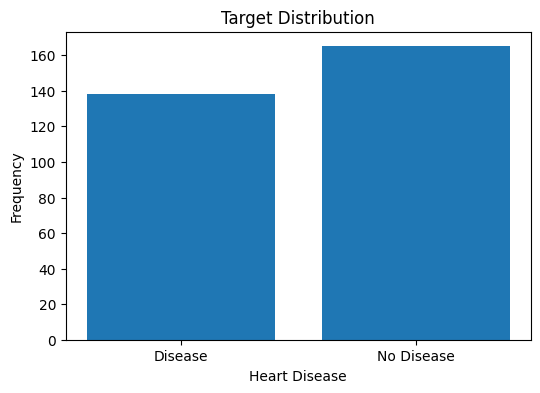

In [68]:
# Univariate Analysis for 'target' (Bar plot)
target_counts = df['target'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, tick_label=['No Disease', 'Disease'])
plt.title('Target Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.show()
 # Data is Majorly balance in the Target Column 



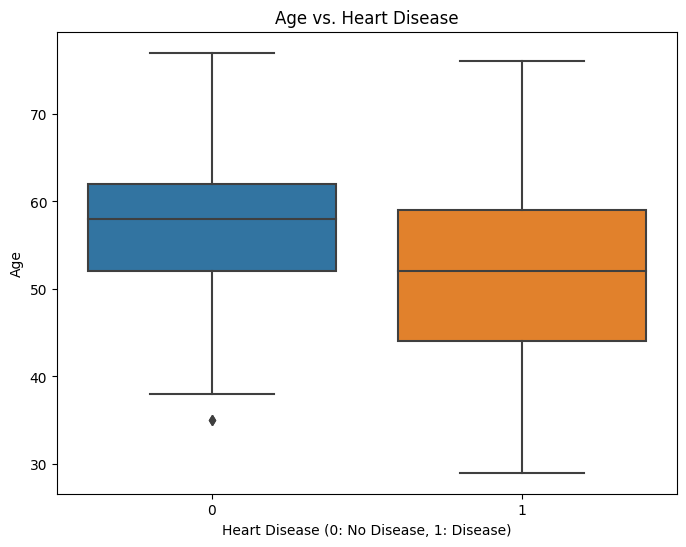

In [69]:
# Bivariate Analysis for 'age' vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Age')
plt.show()

More heart disease in high age group 

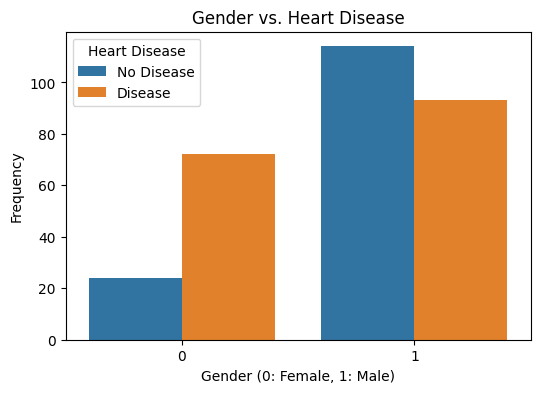

In [70]:
# Bivariate Analysis for 'sex' vs. 'target' (Count plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Gender vs. Heart Disease')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

Male have more heart disease then female 

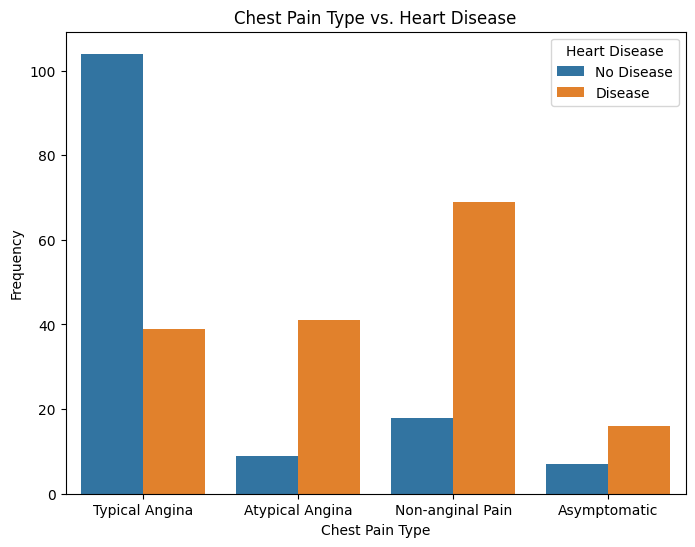

In [71]:
# Bivariate Analysis for 'cp' (Chest Pain Type) vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

Non aginal Pain is more related to Heart disease 

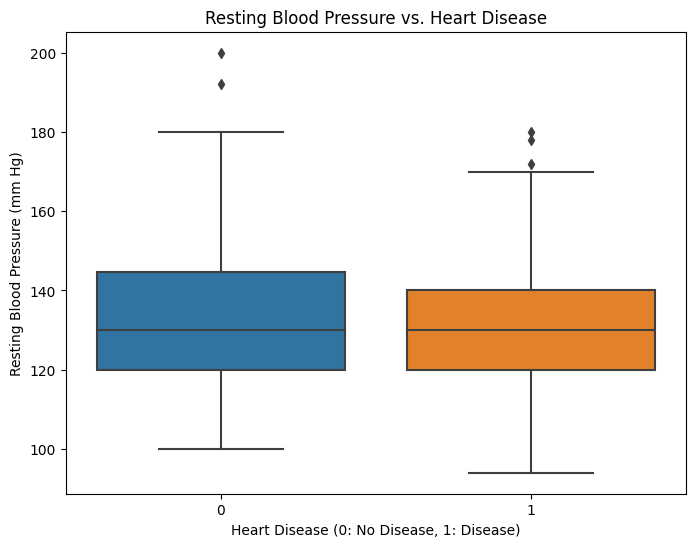

In [72]:
# Bivariate Analysis for 'trestbps' (Resting Blood Pressure) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()


Text(0, 0.5, 'Serum Cholesterol (mg/dl)')

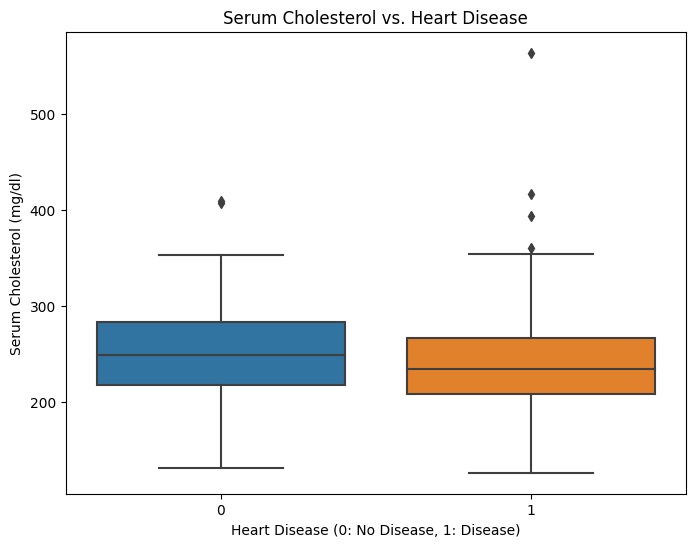

In [73]:
# Bivariate Analysis for 'chol' (Serum Cholesterol) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Serum Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Serum Cholesterol (mg/dl)')

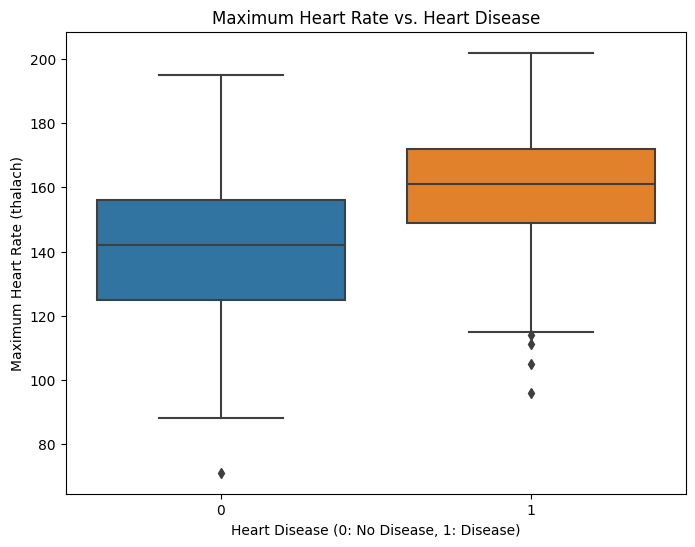

In [74]:
# Bivariate Analysis for 'thalach' (Maximum Heart Rate) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

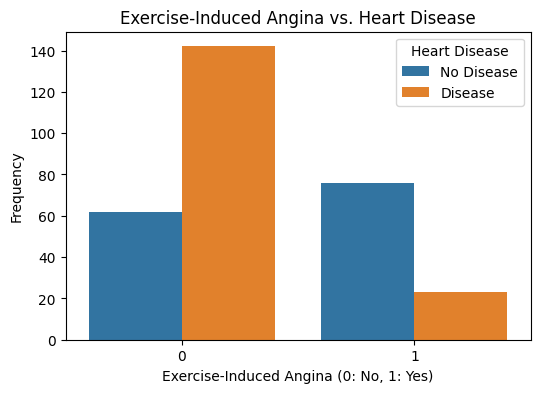

In [75]:
# Bivariate Analysis for 'exang' (Exercise-Induced Angina) vs. 'target' (Count plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-Induced Angina vs. Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


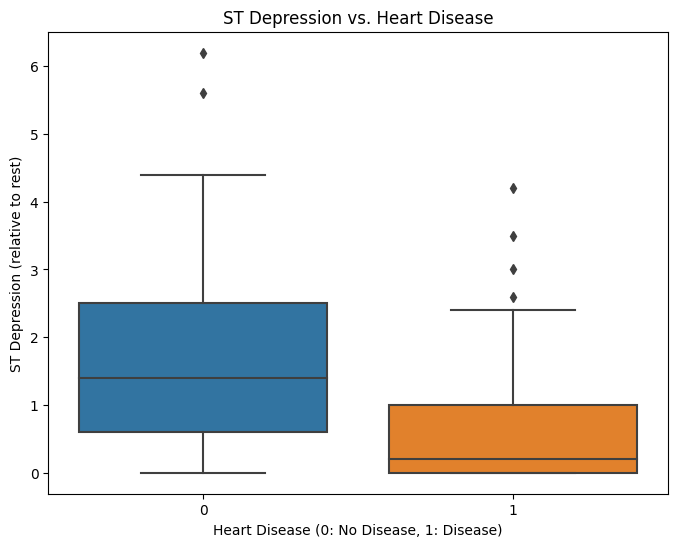

In [76]:
# Bivariate Analysis for 'oldpeak' (ST Depression) vs. 'target' (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression vs. Heart Disease')
plt.xlabel('Heart Disease (0: No Disease, 1: Disease)')
plt.ylabel('ST Depression (relative to rest)')
plt.show()

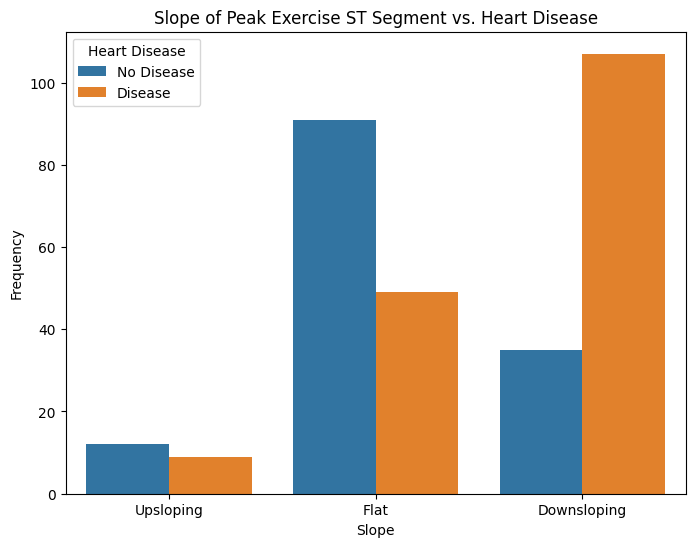

In [77]:
# Bivariate Analysis for 'slope' (Slope of Peak Exercise ST Segment) vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='slope', hue='target', data=df)
plt.title('Slope of Peak Exercise ST Segment vs. Heart Disease')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

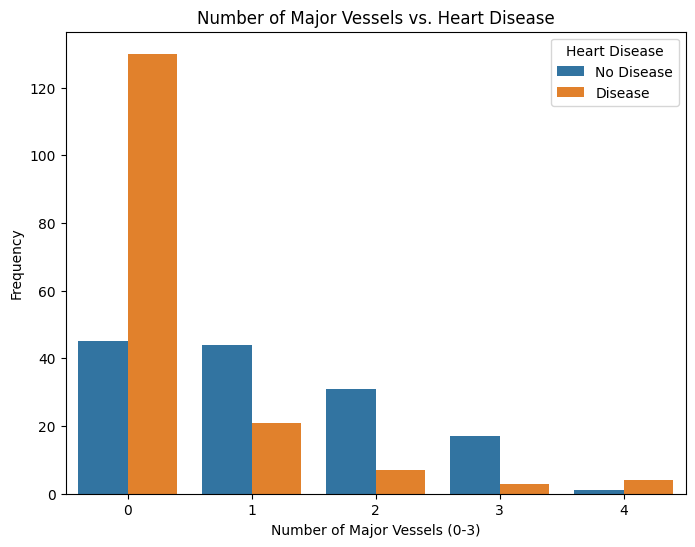

In [78]:
# Bivariate Analysis for 'ca' (Number of Major Vessels) vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', hue='target', data=df)
plt.title('Number of Major Vessels vs. Heart Disease')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


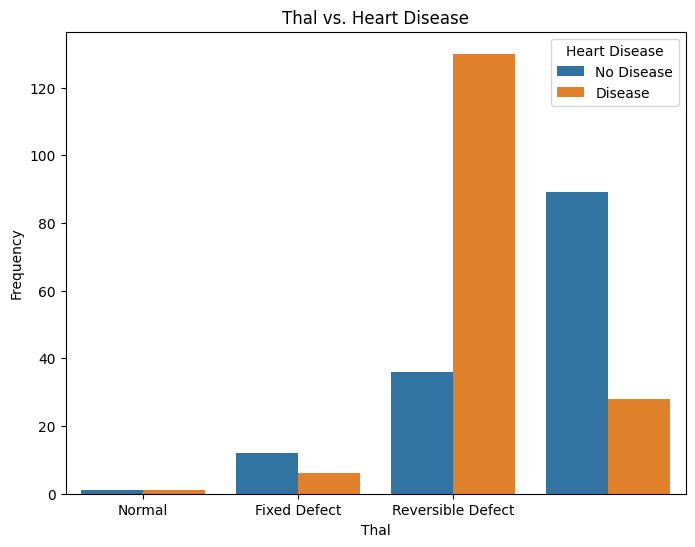

In [79]:
# Bivariate Analysis for 'thal' vs. 'target' (Count plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='target', data=df)
plt.title('Thal vs. Heart Disease')
plt.xlabel('Thal')
plt.ylabel('Frequency')
plt.xticks([0, 1, 2], ['Normal', 'Fixed Defect', 'Reversible Defect'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

In [80]:
correlation_matrix = df.corr()

In [81]:
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


heart disease is there or not is Highly corelated with thalach ,exang,oldpeak,slope ,ca ,thal,cp

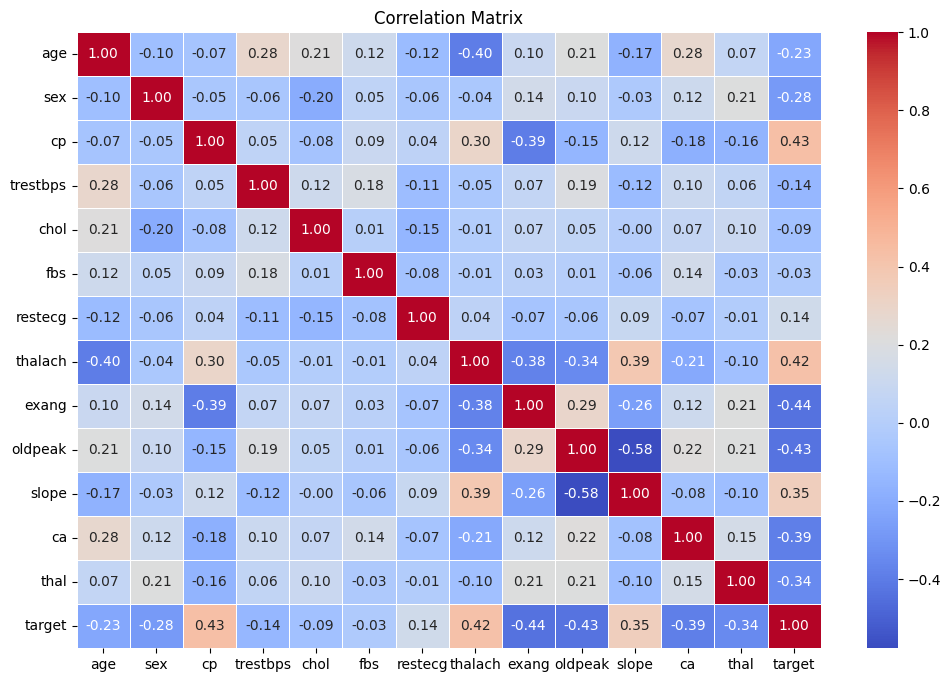

In [82]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

we can se the highest correlation with heat map

In [83]:
# Select only the numeric columns for PCA (exclude non-numeric columns)
numeric_features = df.select_dtypes(include=[np.number])
X = numeric_features.drop(columns=['target'])  # Exclude the target column


In [84]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Performing PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [86]:
# Variance explained by the first two components
explained_variance = pca.explained_variance_ratio_


In [87]:
# Print the variance explained by each of the 2 components
print("Variance Explained by Each Component:")
for i, variance in enumerate(explained_variance):
    print(f"Component {i + 1}: {variance:.4f}")


Variance Explained by Each Component:
Component 1: 0.2125
Component 2: 0.1182


In [88]:
# Total variance explained by the 2 components
total_variance_explained = explained_variance.sum()
print(f"Total Variance Explained by 2 Components: {total_variance_explained:.4f}")

Total Variance Explained by 2 Components: 0.3307


In [89]:
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


In [90]:
# Concatenate PCA components with target variable
pca_df = pd.concat([pca_df, df['target']], axis=1)


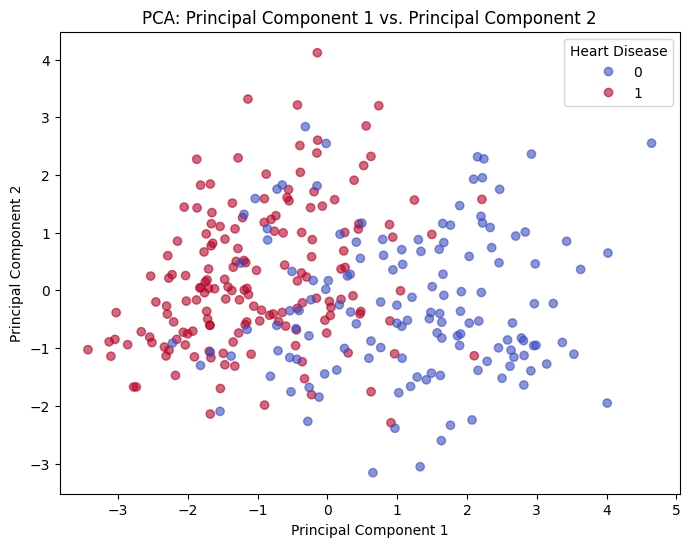

In [91]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['target'],
    cmap='coolwarm',
    alpha=0.6
)
plt.title('PCA: Principal Component 1 vs. Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Heart Disease')
plt.show()

## Thank you